# 차트 데이터 

In [1]:
import pymysql
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# 쿼리를 입력하면 db에 있는 데이터를 pandas DataFrame형태로 반환
def dbQuery(query):
    
    conn = pymysql.connect(host='zuzak.cvqcrkck1aqg.us-east-1.rds.amazonaws.com', user='getChan', password='cksdl951!!',db='zuzak', charset='euckr')
    q = query
    try:
        with conn.cursor() as cursor:
            df = pd.read_sql(q, con=conn)
            cursor.fetchall()
    finally:
        conn.close()
        return df

# DataFrame 전처리 함수.
def dfFilter(dataFrame):
    df = dataFrame.set_index("YYMMDD")
    df.ranking =pd.to_numeric(df.ranking)

    return df

# dataFrame 시각화
def dfPlot(dataFrame):
    dataFrame.plot()
    plt.gca().invert_yaxis()
    plt.ylabel('ranking')
    plt.show()


        ranking title artist
YYMMDD                      
170702       69    좋니    윤종신
170703       65    좋니    윤종신
170704       72    좋니    윤종신
170705       83    좋니    윤종신
170706       81    좋니    윤종신
170707       70    좋니    윤종신
170708       63    좋니    윤종신
170709       58    좋니    윤종신
170710       53    좋니    윤종신
170711       52    좋니    윤종신
170712       45    좋니    윤종신
170713       37    좋니    윤종신
170714       33    좋니    윤종신
170715       31    좋니    윤종신
170716       28    좋니    윤종신
170717       27    좋니    윤종신
170718       37    좋니    윤종신
170719       38    좋니    윤종신
170720       30    좋니    윤종신
170721       28    좋니    윤종신
170722       29    좋니    윤종신
170723       26    좋니    윤종신
170724       26    좋니    윤종신
170725       27    좋니    윤종신
170726       26    좋니    윤종신
170727       26    좋니    윤종신
170728       23    좋니    윤종신
170729       24    좋니    윤종신
170730       22    좋니    윤종신
170731       19    좋니    윤종신
170801       19    좋니    윤종신
170802       19    좋니    윤종신
170803       1

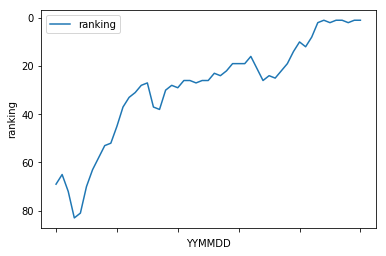

         ranking
count  51.000000
mean   29.294118
std    21.881768
min     1.000000
25%    17.500000
50%    26.000000
75%    37.000000
max    83.000000
         ranking
ranking      1.0


In [3]:
# 메인함수
if __name__ == "__main__":
    # 쿼리문 입력
    query = """ SELECT * FROM zuzak.genie where title = '지나오다' order by YYMMDD; """
    
    Chartdf = dbQuery(query)
    Chartdf = dfFilter(Chartdf)
    
    # 쿼리결과 없으면
    if Chartdf.empty:
        print('결과 데이터가 없습니다.')
        
    # 쿼리 결과
    else :
        print(Chartdf)
        
        print('총 차트 진입일 = '+str(len(Chartdf)))
        
        #시각화
        dfPlot(Chartdf)

        #데이터 정보 출력
        print(Chartdf.describe())

        #데이터 피어슨 상관계수
        print(Chartdf.corr(method='pearson'))
        

# 네이버트렌드

In [4]:
#-*- coding: utf-8 -*-
import urllib.request
import json

                ratio
period               
2017-07-01    2.29612
2017-07-02    5.69618
2017-07-03    4.20540
2017-07-04    3.54937
2017-07-05    2.87297
2017-07-06    3.44983
2017-07-07    3.38423
2017-07-08    3.28243
2017-07-09    3.59461
2017-07-10    3.30505
2017-07-11    3.18968
2017-07-12    3.61950
2017-07-13    3.32541
2017-07-14    4.27553
2017-07-15    4.11039
2017-07-16    4.08551
2017-07-17    4.22350
2017-07-18    3.71903
2017-07-19    4.04705
2017-07-20    4.24838
2017-07-21    4.53794
2017-07-22    4.49044
2017-07-23    4.22350
2017-07-24    4.59902
2017-07-25    4.72344
2017-07-26    4.76642
2017-07-27    5.51747
2017-07-28    5.91788
2017-07-29    6.53093
2017-07-30    6.40425
2017-07-31    6.97658
2017-08-01    7.00599
2017-08-02    7.09195
2017-08-03    8.02624
2017-08-04    8.89492
2017-08-05    8.14161
2017-08-06    8.36330
2017-08-07    9.41974
2017-08-08   10.21830
2017-08-09    9.55548
2017-08-10   10.55762
2017-08-11   13.95995
2017-08-12   13.30392
2017-08-13

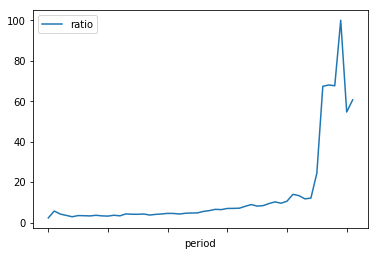

            ratio
count   52.000000
mean    13.734171
std     21.339809
min      2.296120
25%      4.075895
50%      5.606825
75%      9.721185
max    100.000000
       ratio
ratio    1.0


In [5]:
def NaverTrend():
    client_id = "_X9iNbtxufWnpoN9n0gx"
    client_secret = "xUdZWWvtJJ"
    url = "https://openapi.naver.com/v1/datalab/search";

    body = """{
            \"startDate\":\"2017-07-01\",
            \"endDate\":\"2017-08-21\",
            \"timeUnit\":\"date\",
            \"keywordGroups\":
                [
                    {
                    \"groupName\":\"좋니\",
                    \"keywords\":
                        [
                        \"좋니\"
                        ]
                    }
                ]
            }""";

    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    request.add_header("Content-Type","application/json")
    response = urllib.request.urlopen(request, data=body.encode("utf-8"))
    rescode = response.getcode()
    if(rescode==200):
        response_body = response.read()
    else:
        print("Error Code:" + rescode)

        
    # plotting
    naver = response_body
    jsondata = json.loads(naver.decode())
    
    # 검색 데이터 필터링
    tmp = jsondata['results'][0]['data']
    df = pd.DataFrame(tmp)
    df.index = df.period
    del df['period']
    
    return df
    
    # 메인함수
if __name__ == "__main__":
    Naverdf = NaverTrend()
    print(Naverdf)
    print('결과 레코드 수 = '+str(len(Naverdf)))
    Naverdf.plot()
    plt.show()

    #데이터 정보 출력
    print(Naverdf.describe())

    #데이터 피어슨 상관계수
    print(Naverdf.corr(method='pearson'))


# 상관분석

In [6]:
# 데이터프레임 합치기
def MergeData(naver, chart):
    # Naverdf 조정
    naver.rename(columns={'ratio':'naver'}, index={'period':'YYMMDD'},inplace=True)
    naver.index = naver.index.map(lambda x : x[2:4]+x[5:7]+x[8:10])
    naver.index.names = ['YYMMDD']
    df = pd.concat([Chartdf, Naverdf], axis=1, join_axes=[Naverdf.index])
    # ranking 값 뒤집기
    df.ranking = df.ranking.map(lambda x: (101-x))
    return df

In [7]:
if __name__=='__main__':
    df = MergeData(Naverdf, Chartdf)

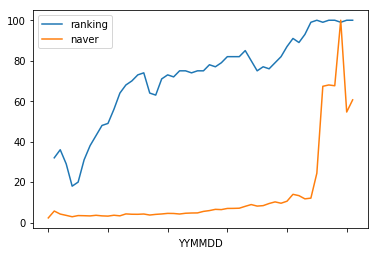

In [18]:
df.plot()
plt.xlim(df.index[0], df.index[-1])
plt.show()

In [20]:
df.corr(method='pearson')

,ranking,naver
ranking,1.00000,0.55116
naver,0.55116,1.00000


In [22]:
df.head()

,ranking,title,artist,naver
YYMMDD,,,,
170701,NaN,NaN,NaN,2.29612
170702,32.0,좋니,윤종신,5.69618
170703,36.0,좋니,윤종신,4.20540
170704,29.0,좋니,윤종신,3.54937
170705,18.0,좋니,윤종신,2.87297


# 속성 추출
1. 차트 진입후 5위 이내까지 진입한 일수
2. 해당 곡 아티스트의 다른 곡이 차트에 진입한 일수
3. 차트 진입 후 5위 이내까지 일간 랭킹 상승 평균치
4. 네이버 트렌드와 음원차트의 상관계수
5. and more...